In [39]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Path to data
path = r"F:\Reanalysis Data\Monthly\Combined\INM CM5 0\corrected"

# Get all station file paths
station_files = [os.path.join(path, file)
                 for file in os.listdir(path) if file.endswith('.csv')]

# Read all station CSVs into DataFrames
stations_df = [pd.read_csv(file, index_col=0, parse_dates=True)
               for file in station_files]

# Excluded because not usable
excluded_stations = ['GT0351005', 'GT0918001', 'GT0925002', 'GT1067015', 'GT1213007',
       'GT1519900', 'GT1541007', 'GT1578027', 'GT1586034', 'GT1931012',
       'GT2216002', 'GT2224006', 'GT2290014', 'GT2626900', 'GT2642900',
       'GT2747021', 'GT2764030', 'GT3029004', 'GT3551010', 'GT3813009',
       'GT4712001', 'GT4764007', 'GT4802002', 'GT4977004', 'GT5883030',
       'GT6123019', 'GT6459900', 'GT6852001', 'GT7536006', 'GT7587900',
       'GT7857001', 'GT8549900', 'GT8889023', 'GT9141014', 'GT9162023',
       'GT9451004']
stations_df = [df for df in stations_df if df['WELL ID'].iloc[0] not in excluded_stations]

In [41]:
df = stations_df[16]
df.head()

,DISTRICT,LATITUDE,LONGITUDE,Test MSE (lr),Test MSE (xgb),Test R2 (lr),Test R2 (xgb),Train MSE (lr),Train MSE (xgb),Train R2 (lr),...,downscaled_ssp_245_xgb,downscaled_ssp_585_lr,downscaled_ssp_585_xgb,wtable,mbc_hist_lr,mbc_hist_xgb,mbc_ssp_245_lr,mbc_ssp_245_xgb,mbc_ssp_585_lr,mbc_ssp_585_xgb
1980-01-01,Pirojpur,22.6236,90.1542,0.034465,0.034331,0.63163,0.633058,0.025339,0.023141,0.754952,...,NaN,NaN,NaN,2.0525,1.220174,1.072531,NaN,NaN,NaN,NaN
1980-02-01,Pirojpur,22.6236,90.1542,0.034465,0.034331,0.63163,0.633058,0.025339,0.023141,0.754952,...,NaN,NaN,NaN,2.0025,1.919635,1.817433,NaN,NaN,NaN,NaN
1980-03-01,Pirojpur,22.6236,90.1542,0.034465,0.034331,0.63163,0.633058,0.025339,0.023141,0.754952,...,NaN,NaN,NaN,1.9460,1.913908,1.654600,NaN,NaN,NaN,NaN
1980-04-01,Pirojpur,22.6236,90.1542,0.034465,0.034331,0.63163,0.633058,0.025339,0.023141,0.754952,...,NaN,NaN,NaN,1.8075,1.730353,1.658360,NaN,NaN,NaN,NaN
1980-05-01,Pirojpur,22.6236,90.1542,0.034465,0.034331,0.63163,0.633058,0.025339,0.023141,0.754952,...,NaN,NaN,NaN,1.4675,1.464189,1.538375,NaN,NaN,NaN,NaN


In [53]:
station_stats = []
try:
    for df in stations_df:
        data = {}
        df = df.dropna(subset=['wtable'])
        data['District'] = df['DISTRICT'].iloc[0]
        data['Upaliza'] = df['UPAZILA'].iloc[0]
        data['Well Id'] = df['WELL ID'].iloc[0]
        data['lat'] = df['LATITUDE'].iloc[0]
        data['lon'] = df['LONGITUDE'].iloc[0]
        data['mse_lr'] = mean_squared_error(df['wtable'], df['mbc_hist_lr'])
        data['mse_xgb'] = mean_squared_error(df['wtable'], df['mbc_hist_xgb'])
        data['r2_lr'] = r2_score(df['wtable'], df['mbc_hist_lr'])
        data['r2_xgb'] = r2_score(df['wtable'], df['mbc_hist_xgb'])
        data['obs_mean'] = df['wtable'].mean()
        data['obs_std'] = df['wtable'].std()
        data['obs_min'] = df['wtable'].min()
        data['obs_max'] = df['wtable'].max()
        data['mbc_mean_lr'] = df['mbc_hist_lr'].mean()
        data['mbc_std_lr'] = df['mbc_hist_lr'].std()
        data['mbc_mean_xgb'] = df['mbc_hist_xgb'].mean()
        data['mbc_std_xgb'] = df['mbc_hist_xgb'].std()
        station_stats.append(data)
        print("✅ Done processing", df['DISTRICT'].iloc[0], df['UPAZILA'].iloc[0])        
except Exception as e:
    print(f"Error processing {df['DISTRICT'].iloc[0]}: {e}, {df['WELL ID'].iloc[0]}")
    
stats = pd.DataFrame(station_stats)

✅ Done processing Barguna Bamna
✅ Done processing Brahmanbaria Brahamanbaria Sadar
✅ Done processing Chandpur Chandpur Sadar
✅ Done processing Cumilla Cumilla Sadar
✅ Done processing Faridpur Faridpur Sadar 
✅ Done processing Faridpur Faridpur Sadar 
✅ Done processing Gaibandha Sadullapur
✅ Done processing Jamalpur Jamalpur Sadar
✅ Done processing Jessore Jessore Sadar
✅ Done processing Khulna Khulna Sadar
✅ Done processing Kishoreganj Itna
✅ Done processing Kushtia Bheramara
✅ Done processing Madaripur Kalkini
✅ Done processing Meherpur Meherpur Sadar
✅ Done processing Mymensingh Mymensingh Sadar
✅ Done processing Pabna Pabna Sadar
✅ Done processing Pirojpur Kawkhali
✅ Done processing Rajshahi Paba
✅ Done processing Rangamati Bagaichhari
✅ Done processing Sirajganj Sirajganj Sadar
✅ Done processing Sunamganj Sunamganj Sadar
✅ Done processing Tangail Kalihati
✅ Done processing Tangail Mirzapur
✅ Done processing Tangail Tangail Sadar
✅ Done processing Thakurgaon Thakurgaon


<Axes: >

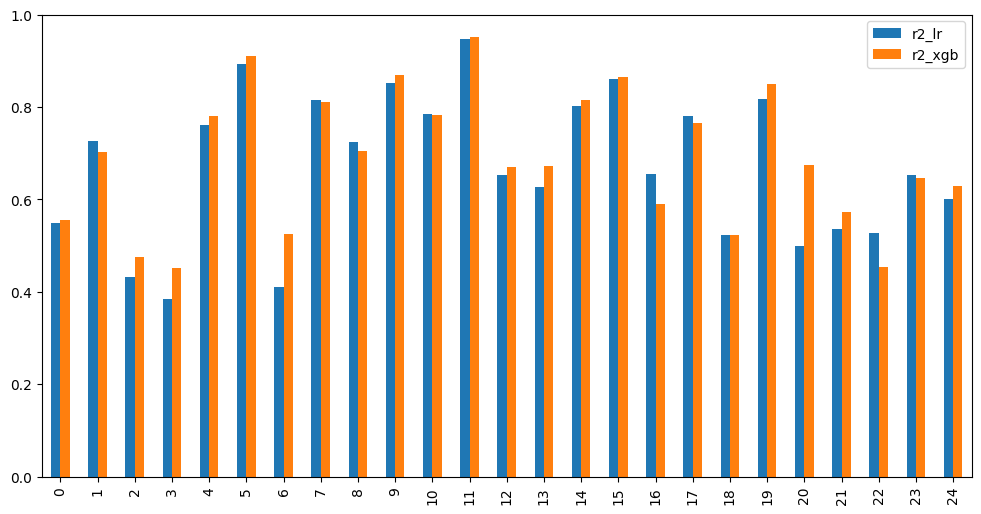

In [43]:
stats[['r2_lr', 'r2_xgb']].plot(kind='bar', figsize=(12, 6))

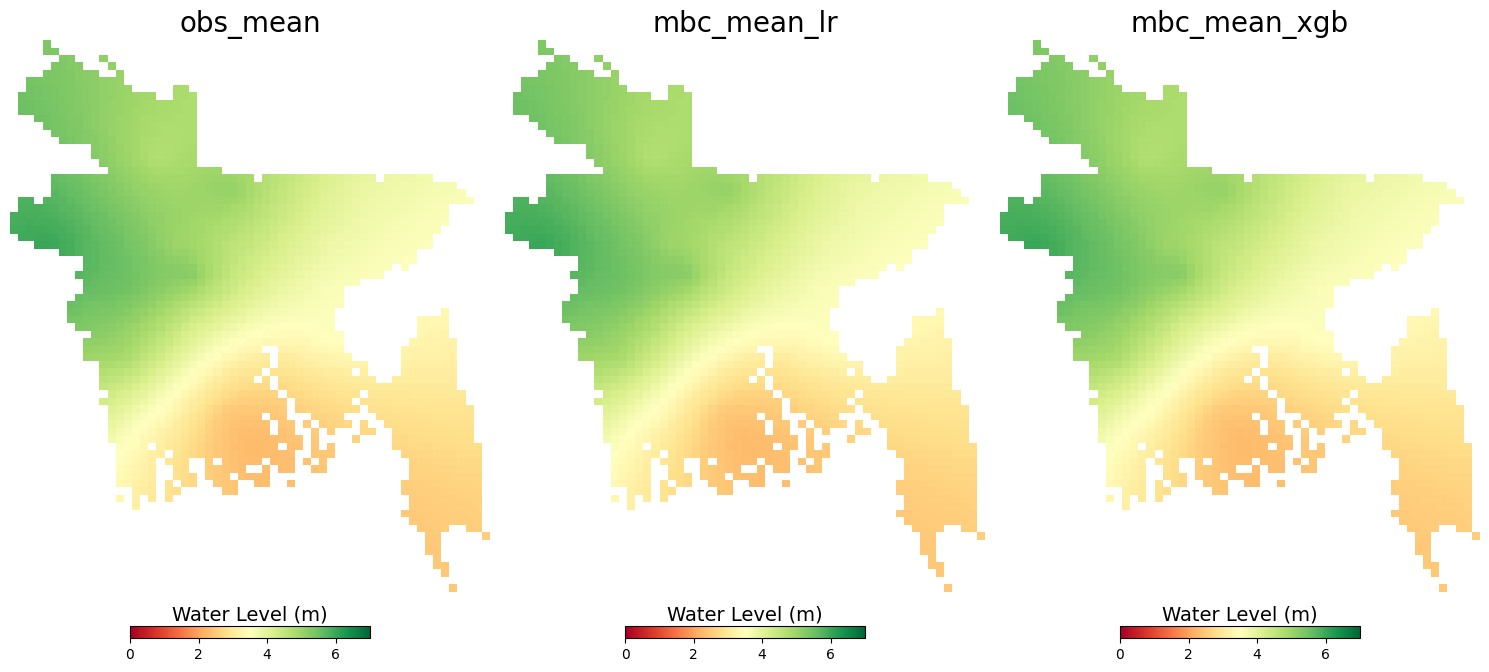

In [49]:
from Interpolate_Clip_Map import interpolated_clipped_map

shapefile_path = r"E:\Downloads\bgd_adm_bbs_20201113_shp\bgd_adm_bbs_20201113_SHP\bgd_admbnda_adm2_bbs_20201113.shp"
interpolated_clipped_map(stats, ['obs_mean', 'mbc_mean_lr', 'mbc_mean_xgb'], shapefile_path,
                         cbar_label= 'Water Level (m)',figsize=(15, 7.5), rows=1, cols=3)

In [50]:
shapefile = gpd.read_file(shapefile_path).to_crs(epsg=4326)
geometry = [Point(xy) for xy in zip(stats['lon'], stats['lat'])]
gdf = gpd.GeoDataFrame(stats, geometry=geometry, crs='EPSG:4326')

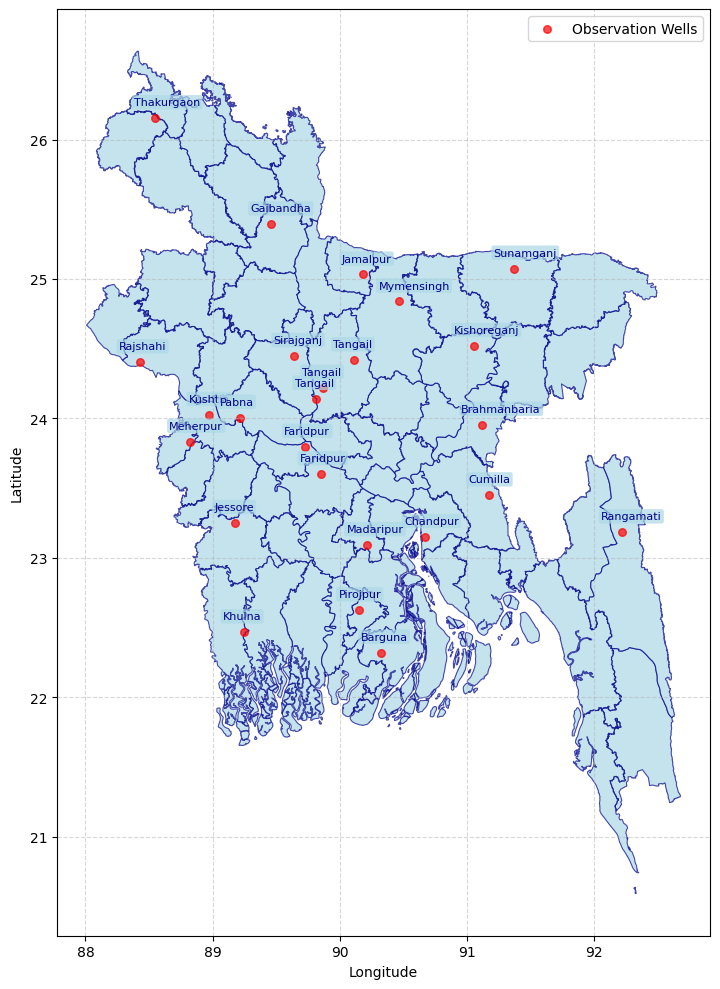

In [52]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapefile (e.g., a country or region boundary)
shapefile.plot(ax=ax, color='lightblue', edgecolor='darkblue', linewidth=0.8, alpha=0.7)

# Plot the point GeoDataFrame
gdf.plot(ax=ax, marker='o', color='red', markersize=30, alpha=0.7, label='Observation Wells')
for idx, row in gdf.iterrows():
    ax.annotate(
        text=str(row['District']),
        xy=(row['lon'], row['lat']),
        xytext=(-15, 15),  # offset below the station ID
        textcoords='offset points',
        fontsize=8,
        fontweight='normal',
        color='darkblue',
        bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7, edgecolor='none'),
        ha='left',
        va='top'
    )
# Add optional decorations
# ax.set_title('Spatial Distribution of Observation Wells', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Optional: remove axes if not needed
# ax.axis('off')

plt.tight_layout()
plt.show()

In [47]:
stats

,District,Upaliza,Well Id,lat,lon,mse_lr,mse_xgb,r2_lr,r2_xgb,obs_mean,obs_std,mbc_mean_lr,mbc_std_lr,mbc_mean_xgb,mbc_std_xgb
0,Barguna,Bamna,GT0419003,22.320000,90.327500,0.066981,0.066157,0.549077,0.554623,1.790070,0.385870,1.790070,0.385870,1.790070,0.383849
1,Brahmanbaria,Brahamanbaria Sadar,GT1213005,23.955600,91.120800,0.471676,0.513355,0.727080,0.702964,3.180511,1.316254,3.180511,1.316254,3.180511,1.316253
2,Chandpur,Chandpur Sadar,GT1322004,23.150000,90.670000,0.366172,0.338603,0.432127,0.474883,2.398401,0.803961,2.398401,0.803961,2.398401,0.803961
3,Cumilla,Cumilla Sadar,GT1967900,23.448660,91.176890,3.864675,3.453143,0.385516,0.450950,4.608208,2.513367,4.608208,2.513366,4.608208,2.513366
4,Faridpur,Faridpur Sadar,GT2947007,23.600000,89.850000,0.516385,0.472036,0.760875,0.781412,3.811849,1.471269,3.811849,1.471269,3.811849,1.455772
5,Faridpur,Faridpur Sadar,GT2947900,23.797200,89.728300,0.171371,0.143201,0.893092,0.910666,4.401105,1.268886,4.401105,1.268886,4.401105,1.257974
6,Gaibandha,Sadullapur,GT3282011,25.392400,89.462100,1.047432,0.844525,0.409931,0.524238,3.530025,1.333918,3.530025,1.333918,3.530025,1.315322
7,Jamalpur,Jamalpur Sadar,GT3936900,25.032200,90.180600,0.566371,0.575116,0.814376,0.811510,6.545699,1.750239,6.545699,1.750239,6.545699,1.750239
8,Jessore,Jessore Sadar,GT4147900,23.250000,89.176600,0.608971,0.652499,0.723749,0.704003,5.816809,1.487207,5.816809,1.487207,5.816809,1.487207
9,Khulna,Khulna Sadar,GT4751900,22.465800,89.244400,0.009232,0.008142,0.852017,0.869490,3.261067,0.250278,3.261067,0.250278,3.261067,0.248292
